<a href="https://colab.research.google.com/github/nitrogenlab/oceanography_colab_notebooks/blob/master/for_anna_hughes/pyompa_for_anna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#install pyompa
!pip install pyompa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyompa: filename=pyompa-0.4.2.0-py3-none-any.whl size=27924 sha256=8ae03b85a1443ddf2f1d4c1b04041b93fbc74981690e166f609c8bcf8650fc71
  Stored in directory: /root/.cache/pip/wheels/01/b0/97/df13377ff74039265402583d089ee534e073be02921005858f
Successfully built pyompa


In [9]:
import pandas
from io import StringIO

#Cruise data provided by Anna. One of the entries for Alt. (m) was blank so I
# just filled in 0.
#I also changed the column names to match up with the endmembers file
cruise_raw_data = """Cruise ID	Depth	Alt	TCO2	Phosphate	Nitrate	Silicate	CT	SA	pdens	Oxygen
OC1901A	77.15	4.84	2024.7	0.78	3.93	5.13	11.305	32.6653	24.90561503	252.28
OC1901A	78.4	3.56	2032.6	0.76	3.75	4.91	11.305	32.6654	24.90573764	252.05
OC1901A	30.62	5.67	2021.5	0.81	3.68	6.49	11.192	32.4193	24.73368304	257.82
OC1901A	31.32	4.61	2018.4	0.71	2.56	4.32	11.193	32.4217	24.73527955	258.26
OC1901A	76.6	3.44	2037.3	0.77	3.66	4.43	11.311	32.6619	24.90188256	255.02
OC1901A	79.11	0.00	2041.7	0.79	3.88	4.87	11.31	32.6619	24.902224	254.46
OC1901A	31.61	4.95	2033.1	0.72	3.11	5.3	11.165	32.3617	24.69370732	259.15
OC1901A	30.99	6.27	2015.1	0.8	3.74	6.07	11.162	32.3596	24.69243392	259.46
OC1901A	77.71	2.96	2026.3	0.76	3.61	4.22	11.323	32.6427	24.88498532	255.39
OC1901A	76.89	4.12	2035.4	0.69	2.84	3.2	11.322	32.6427	24.88500336	255.73
OC1901A	78.04	2.87	2023.7	0.73	3.41	3.79	11.32	32.635	24.87940064	258.12
OC1901A	76.79	3.92	2017.2	0.75	3.4	3.91	11.321	32.635	24.87931977	258.61
OC1901A	28.9	4.57	2013.9	0.71	2.98	4.99	11.19	32.3823	24.70510435	259.42
OC1901A	28.22	4.57	2008	0.77	3.67	6.08	11.19	32.382	24.70491001	258.48
OC1901A	26.94	4.32	2019.8	0.77	3.72	6.03	11.186	32.3709	24.69698001	259.49
OC1901A	27.29	3.26	2022.5	0.76	3.47	5.49	11.189	32.3753	24.69992916	259.98
OC1901A	77.34	3.74	2017.2	0.78	3.63	4.46	11.311	32.6439	24.88790319	257.16
OC1901A	77.8	2.99	2023.1	0.76	3.45	4.74	11.311	32.6438	24.88783534	256.13
OC1901A	32.46	1.19	2017.1	0.81	3.96	5.66	11.259	32.539	24.81474467	256.48
OC1901A	32.39	1.74	2017.7	0.82	3.66	5.45	11.258	32.5369	24.81332497	257.22
OC1901A	24.74	3.39	2019.2	0.79	3.76	5.72	11.234	32.4913	24.78192064	258.66
OC1901A	25.2	1.58	2026.3	0.81	3.75	5.67	11.242	32.5085	24.79400169	258.07
OC1901A	76.48	4.18	2016	0.77	3.33	3.99	11.222	32.6415	24.90204153	261.14
OC1901A	75.59	4.77	2019.1	0.77	3.32	3.94	11.222	32.6415	24.90209386	260.89
OC1901A	31.2	3.11	2004	0.81	3.66	5.52	11.282	32.5736	24.83757566	257.21
OC1901A	30.48	5.74	2014.9	0.81	3.65	5.63	11.292	32.5865	24.84583406	256.27"""
cruise_data_df = pandas.read_table(
    filepath_or_buffer=StringIO(cruise_raw_data), sep="\t")

#Endmembers raw data. The "Params" column was renamed to "Endmember".
endmembers_raw_data = """Endmember	CT	SA	Phosphate	Nitrate	Silicate	Oxygen	pdens	depth
ENPCW1	8.55	34.2	1.57	21.55	28.66	177.51	26.5974688	3000
PSUW0	6.13	32.71	1.21	11.96	19.72	324.84	25.75101993	3000
13CW	13.41	34.85	1.98791658	27.6554277	21.4967842	46.0923796	26.223028	3000"""
endmembers_data_df = pandas.read_table(
    filepath_or_buffer=StringIO(endmembers_raw_data), sep="\t")

As a basic sanity check, do a pairwise scatterplot of all the parameters. In the plots below, the red points are the endmembers, the red boundaries are all values that can be represented as a mixture of those endmembers, and the blue points are the observations

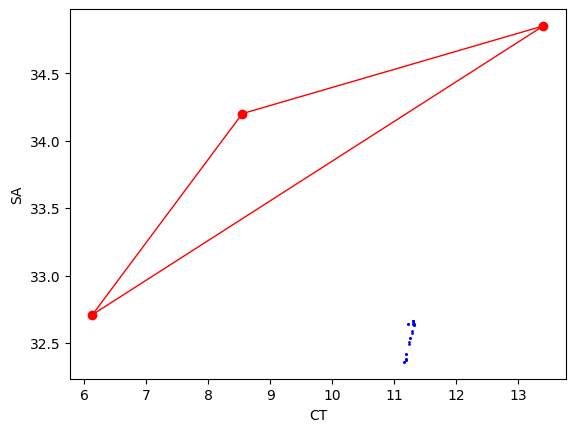

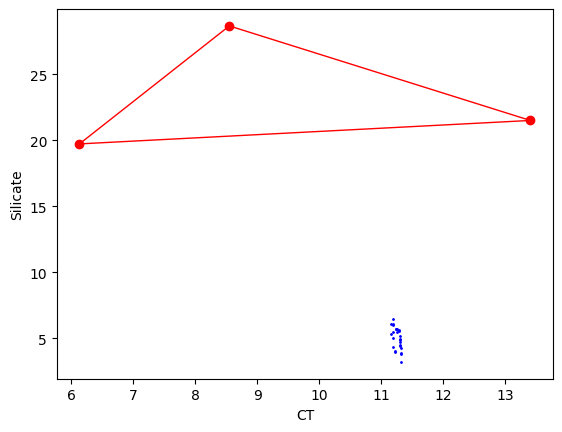

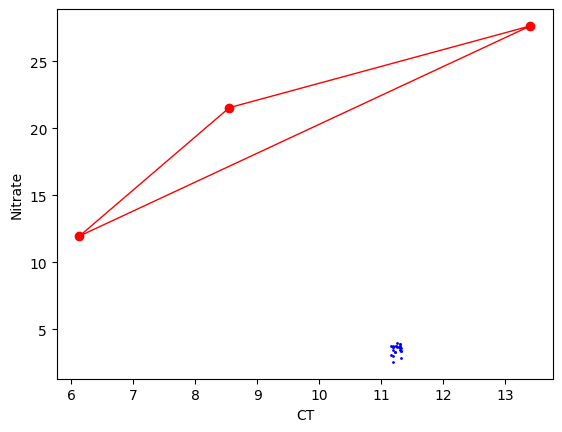

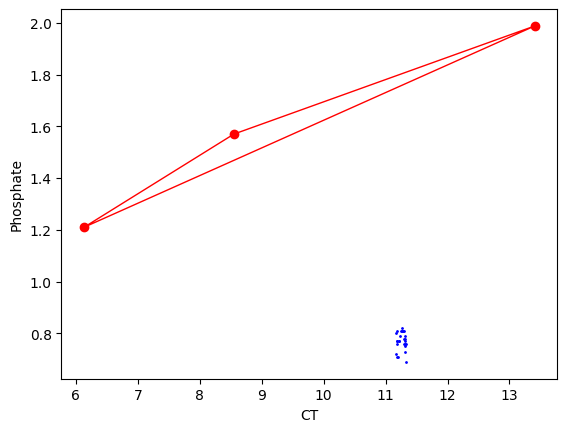

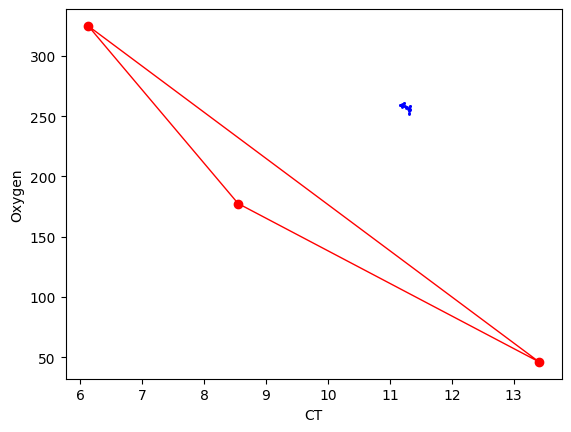

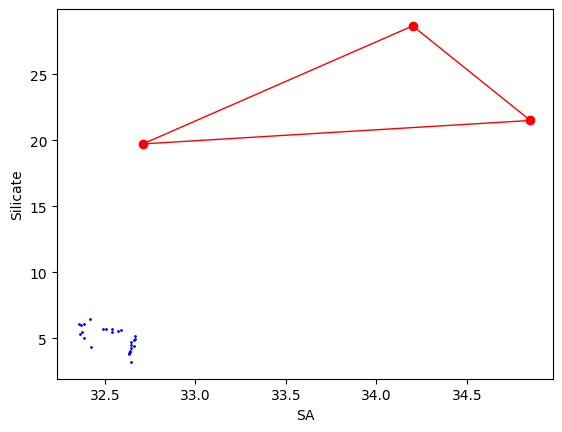

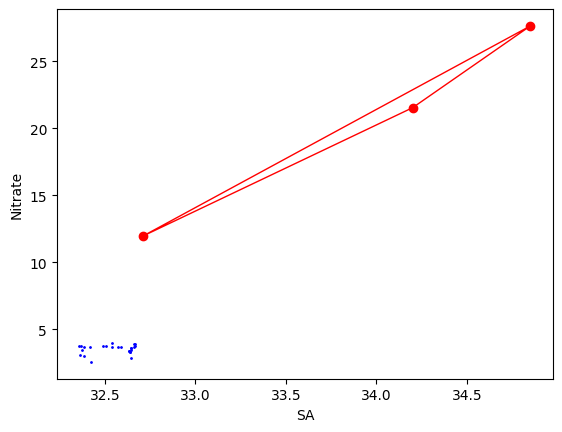

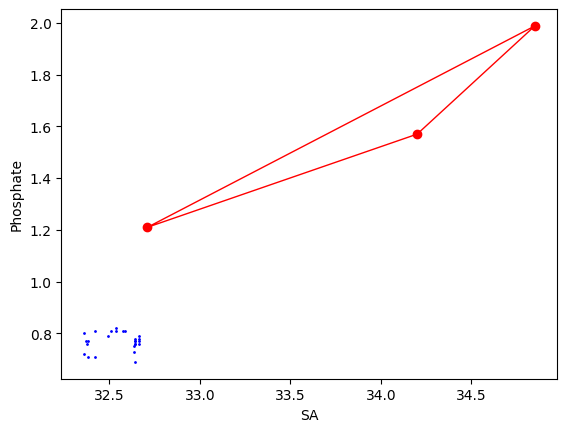

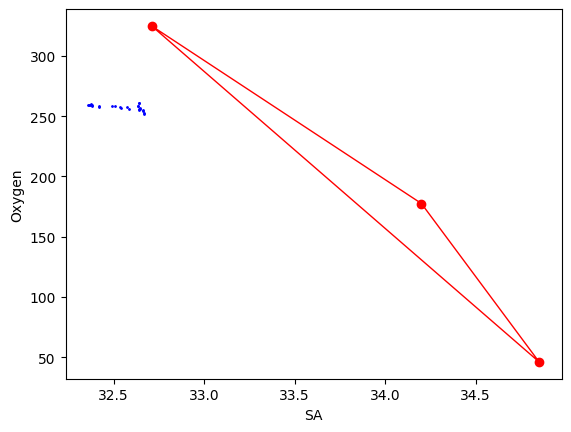

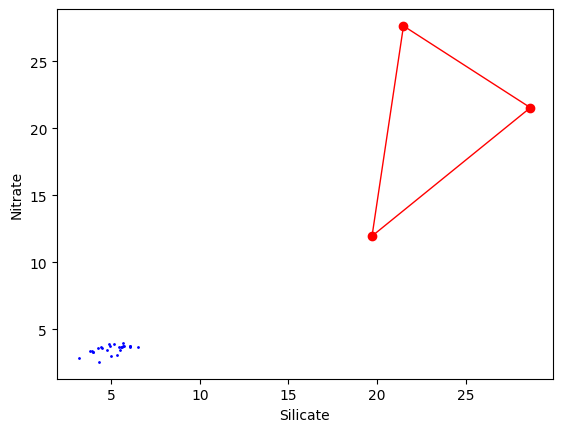

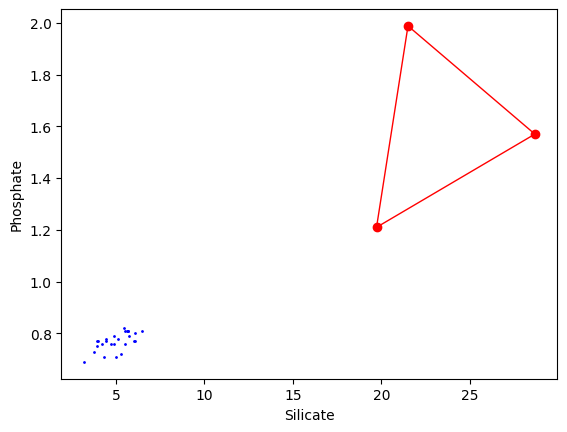

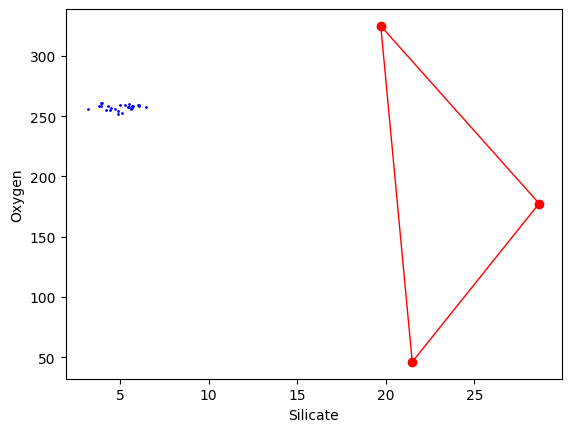

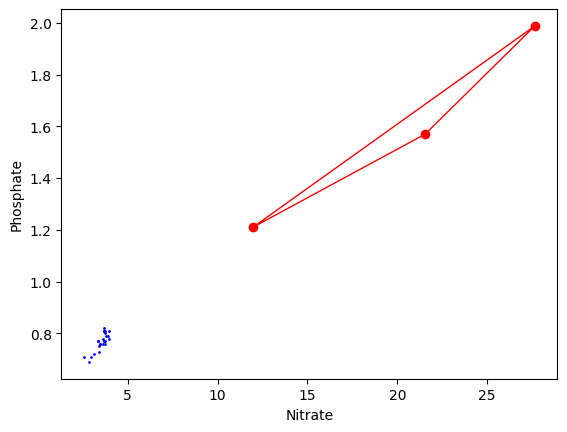

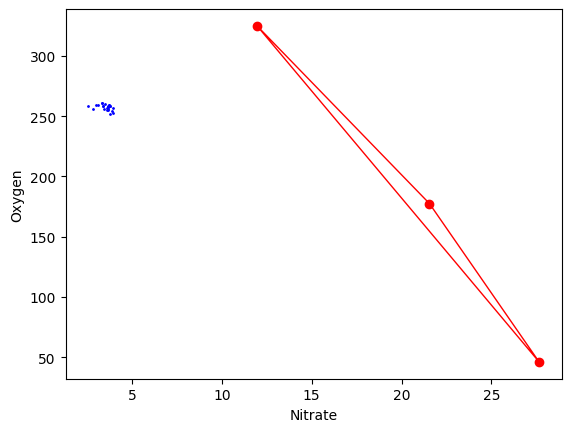

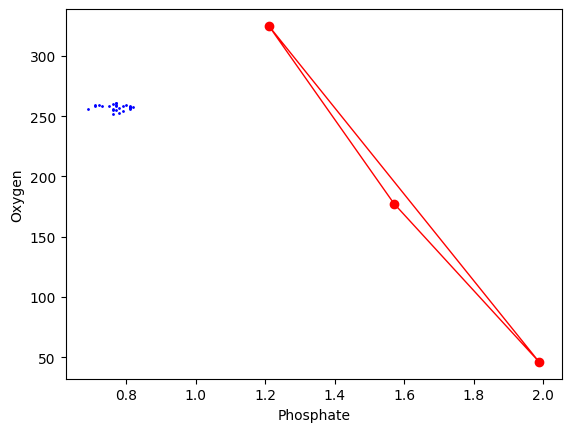

In [33]:
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np

params_to_plot = ["CT", "SA", "Silicate", "Nitrate", "Phosphate", "Oxygen"]

for param1_idx in range(len(params_to_plot)-1):
  for param2_idx in range(param1_idx+1,len(params_to_plot)):
    param1 = params_to_plot[param1_idx]
    param2 = params_to_plot[param2_idx]
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.gca().add_patch(patches.Polygon(np.array(list(zip(endmembers_data_df[param1],
                                        endmembers_data_df[param2]))),
                                        fill=False, color="red"))
    plt.scatter(endmembers_data_df[param1], endmembers_data_df[param2], c="red")
    plt.scatter(cruise_data_df[param1], cruise_data_df[param2], s=1, c="blue")
    plt.show()

Specify the settings

In [12]:
import pyompa

#ratios for remineralization
remineralization_conversion = [
    pyompa.ConvertedParamGroup(
        groupname="phosphate_remin",
        conversion_ratios=[{"Oxygen": -170, "Phosphate": 1.0, "Nitrate": 16.0}],
        always_positive=False)
]

#parameter weightings; these are subjective, but in general the things
# to consider are:
# (1) how reliable the parameter measurements are (noisier parameters receive)
#     comparatively less weight
# (2) the range over which the parameter is likely to vary (if the parameter)
#     varies over a small range (e.g. salinity), you want to give it a
#     higher weighting so that it's given similar importance to other
#     parameters that vary over a larger range
# If the weightings are set in a reasonable range, you'll find that the
# optimal solution stays the same even if the weightings are varied a bit;
# the weightings basically determine which parameters you're going to
# prioritize reducing the residuals of.
param_weightings = {
    "CT": 10.0,
    "SA": 20.0,
    "Silicate": 1.0,
    "Nitrate": 2.0,
    "Phosphate": 1.0,
    "Oxygen": 2.0
}

settings = {
    "param_names": ["CT", "SA", "Silicate", "Nitrate", "Phosphate", "Oxygen"],
    "param_weightings": param_weightings,
    "convertedparam_groups": remineralization_conversion,
}

In [13]:
ompasoln = pyompa.OMPAProblem(
  obs_df = cruise_data_df,
  **settings).solve(
      endmembers_data_df,
      endmember_name_column="Endmember")

Endmember-idx mapping is
 OrderedDict([('ENPCW1', [0]), ('PSUW0', [1]), ('13CW', [2])])
params to use: ['CT', 'SA', 'Silicate', 'Nitrate', 'Phosphate', 'Oxygen']
param weighting: [10. 20.  1.  2.  1.  2.]
Matrix A:
Trying convertedvariable sign constraint: [1]
On example 0 to 26 out of 26
status: optimal
optimal value 55909.141755862845
Original weighted sum squares: 55909.141755862845
Post fix weighted sum squared: 55909.141756095996
Trying convertedvariable sign constraint: [-1]
On example 0 to 26 out of 26
status: optimal
optimal value 36923.88746556625
Original weighted sum squares: 36923.88746556625
Post fix weighted sum squared: 36923.887466021915
On example 0 to 26 out of 26
status: optimal
optimal value 36923.88746556625
Original weighted sum squares: 36923.88746556625
Post fix weighted sum squared: 36923.887466021915
objective: 36923.8874660219


Hard mass conservation - Water mass fractions and deltaP


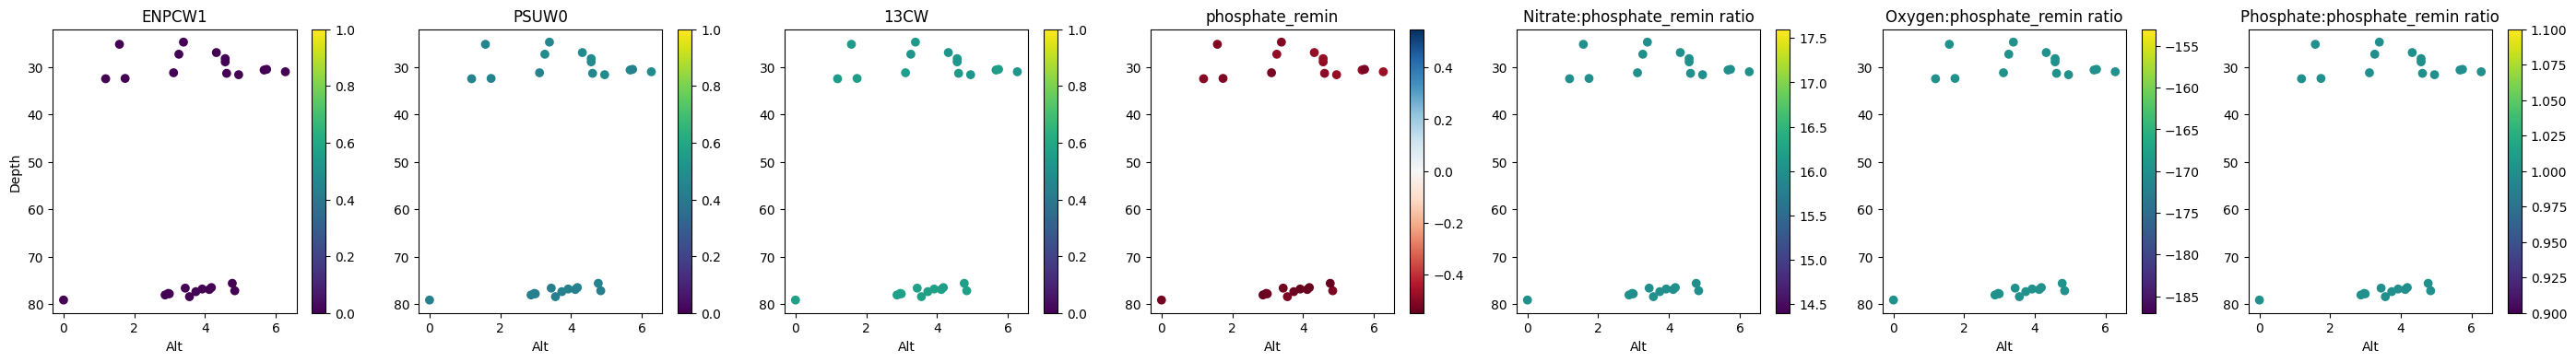

Hard mass conservation - Residuals


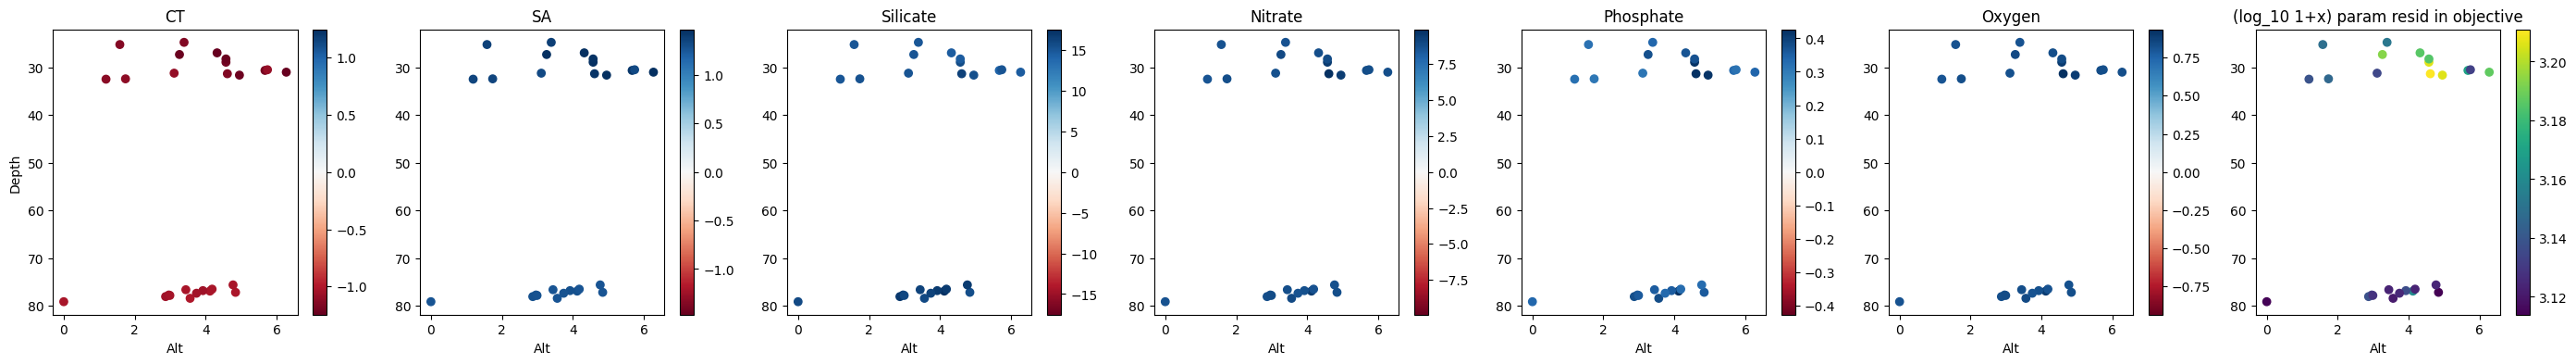

In [14]:
from matplotlib import pyplot as plt
from pyompa import (plot_ompasoln_endmember_fractions,
                    plot_ompasoln_residuals,
                    plot_ompasoln_endmember_usagepenalties)

yaxis_colname = "Depth"
print("Hard mass conservation - Water mass fractions and deltaP")
plot_ompasoln_endmember_fractions(
    ompa_soln=ompasoln,
    xaxis_colname="Alt",
    yaxis_colname=yaxis_colname)
print("Hard mass conservation - Residuals")
plot_ompasoln_residuals(ompa_soln=ompasoln,
                        xaxis_colname="Alt",
                        yaxis_colname=yaxis_colname)

Export solution to CSV

In [35]:
ompasoln.export_to_csv("results.csv",
                   #list any columns from the original observations file to include
                   orig_cols_to_include=["Cruise ID","TCO2","pdens"])

writing to results.csv


In [38]:
!cat results.csv #display the results

Cruise ID,TCO2,pdens,CT,SA,Silicate,Nitrate,Phosphate,Oxygen,CT_resid,SA_resid,Silicate_resid,Nitrate_resid,Phosphate_resid,Oxygen_resid,ENPCW1_frac_total,PSUW0_frac_total,13CW_frac_total,ENPCW1_frac,PSUW0_frac,13CW_frac,phosphate_remin,Nitrate_to_phosphate_remin_ratio,Oxygen_to_phosphate_remin_ratio,Phosphate_to_phosphate_remin_ratio
OC1901A,2024.7,24.90561503,11.305,32.6653,5.13,3.93,0.78,252.28,-1.0190976046901365,1.266352627192731,15.60430518031988,8.76476667477774,0.3600099748395542,0.8254486429583778,0.0,0.42913428635853534,0.5708657136414647,0.0,0.42913428635853534,0.5708657136414647,-0.5140759287556733,16.0,-170.0,1.0
OC1901A,2032.6,24.90573764,11.305,32.6654,4.91,3.75,0.76,252.05,-1.01127622273696,1.2685517696899637,15.826214096236988,8.953416406824386,0.38033243567006303,0.8432337978287023,0.0,0.4280599207056265,0.5719400792943735,0.0,0.4280599207056265,0.5719400792943735,-0.514589234779545,16.0,-170.0,1.0
OC1901A,2021.5,24.73368304,11.192,32.4193,6.49,3.68,0.81,257.82,-1.196